In [0]:
pip install info_gain

In [0]:
from info_gain import info_gain
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score, auc,accuracy_score,confusion_matrix,classification_report
import pydotplus
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

In [0]:
iris = pd.read_csv('/content/drive/My Drive/Colab Notebooks/iris.csv')

In [0]:
le = LabelEncoder()
iris['variety'] = le.fit_transform(iris['variety'])

In [0]:
X = iris.drop(['variety'], axis = 1)
y = iris.variety
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
list1 = [X_train, X_test, y_train, y_test]
print(list1)

In [0]:
#DecisionTree
dt = tree.DecisionTreeClassifier(max_depth=5, criterion= "entropy")
dt.fit(X_train,y_train)
print('DecisionTree')
print('訓練集正確率: ', dt.score(X_train,y_train))
print('測試集正確率: ', dt.score(X_test,y_test))
cnf=confusion_matrix(y_train,dt.predict(X_train))
print('訓練急混淆矩陣: \n', cnf)
cnf=confusion_matrix(y_test,dt.predict(X_test))
print('訓練急混淆矩陣: \n', cnf)
tree.plot_tree(dt, filled=True)

In [0]:
#產生決策樹的圖檔
dot_data = tree.export_graphviz(dt, out_file=None, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [0]:
#使用隨機森林
from sklearn.ensemble import RandomForestClassifier

#n_estimator代表要用多少CART樹(CART樹圍使用GIN算法的決策樹)
rfc =RandomForestClassifier(n_estimators=5)

#從訓練組資料中建立隨機森林模型
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
#利用confusion matrix來看看實際即預測差異
print(confusion_matrix(y_test,rfc_pred))
#利用classificiation report來看precision、recall、f1-score、support
print(classification_report(y_test,rfc_pred))

In [0]:
from sklearn.neighbors import KNeighborsClassifier #KNN演算法

In [0]:
 #KNN演算法
 knn= KNeighborsClassifier(n_neighbors=1) #從k=1開始測試
 knn.fit(X_train,y_train)
 pred = knn.predict(X_test)

 #測試KNN演算法好壞
 #混淆矩陣
 print(confusion_matrix(y_test,pred))
 print(classification_report(y_test,pred))

Text(0, 0.5, 'Error Rate')

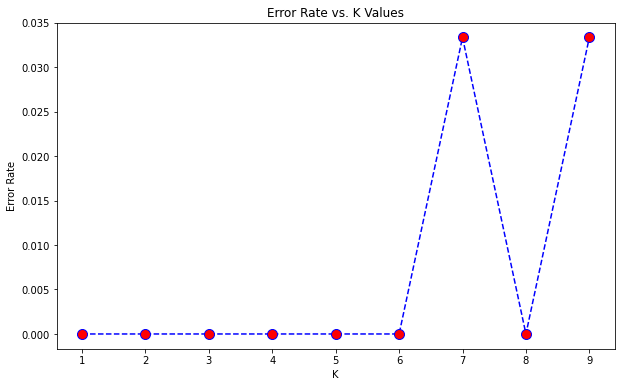

In [0]:
#剛剛只做了k=1來建立模型，現在用for loop來建立迴圈，選擇k值
error_rate = []

for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))
#將k=1~6的錯誤率製圖畫出。k=6之後，錯誤率就在3.5%和0%之間震盪。
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Values')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [0]:
#跟一開始k=1做比較
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH k=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

In [0]:
#跟一開始k=7做比較
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH k=7')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

In [0]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
g_nb = GaussianNB(priors = None)
g_nb_fit = g_nb.fit(X_train, y_train)

g_nb_pred = g_nb.predict(X_test)
print(confusion_matrix(y_test,g_nb_pred))
print('\n')
print(classification_report(y_test,g_nb_pred))

[[18669  1280]
 [ 1258 18793]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94     19949
           1       0.94      0.94      0.94     20051

    accuracy                           0.94     40000
   macro avg       0.94      0.94      0.94     40000
weighted avg       0.94      0.94      0.94     40000



In [0]:
from sklearn.model_selection import train_test_split
#Split the data into train and test sets
X = iris.drop(['variety'], axis=1)
y = iris.variety

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

#使用隨機森林
from sklearn.ensemble import RandomForestClassifier

#n_estimator代表要用多少CART樹(CART樹圍使用GIN算法的決策樹)
rfc =RandomForestClassifier(n_estimators=5)

#從訓練組資料中建立隨機森林模型
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
#利用confusion matrix來看看實際即預測差異
print(confusion_matrix(y_test,rfc_pred))
#利用classificiation report來看precision、recall、f1-score、support
print(classification_report(y_test,rfc_pred))

[[10  0  0]
 [ 0  8  2]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.80      0.84        10
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [1]:
#roc curve比較各種分類器
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=80000)  #產生樣本
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

#隨機森林
rf =RandomForestClassifier(max_depth= 3, n_estimators=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf,tpr_rf, thresholds_rf =roc_curve(y_test, y_pred_rf)
auc_rf =auc(fpr_rf, tpr_rf)

#貝氏
gnb = GaussianNB(priors= None)
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict_proba(X_test)[:, 1]
fpr_gnb, tpr_gnb, thresholds_gnb =roc_curve(y_test, y_pred_gnb)
auc_gnb =auc(fpr_gnb, tpr_gnb)

#繪製 roc curve 
plt.figure(1)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_gnb, tpr_gnb, label='GaussianNB  (area ={:.3f})' .format(auc_gnb))
plt.plot(fpr_rf, tpr_rf, label='RF area ={:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show

NameError: ignored